## Transformations of  Qubits

Introduction.

### The Qubit

The qubit is the idealization of a two-state quantum mechanical system. The two measurable states are expressed

\begin{equation}\label{eq:01}
  |0\rangle \equiv \begin{bmatrix} 1 \\ 0 \end{bmatrix} \and
  |1\rangle \equiv \begin{bmatrix} 0 \\ 1 \end{bmatrix} 
\end{equation}

while, in general the system is in some superposition of these states, namely

\begin{equation}\label{eq:sup}
  |\psi\rangle = \alpha|0\rangle + \beta|1\rangle
\end{equation}

where $\alpha$ and $\beta$ are complex **probability amplitudes**. The square of the respective magnitude is interpreted as the probability of finding $|\psi\rangle$ in that state. That is, $|\alpha|^2$ is the probability of $|\psi\rangle$ taking the form $|0\rangle$ and 
$|\beta|^2$ is the probability of $|\psi\rangle$ taking the form $|1\rangle$. As these are the only two possibilities it follows that $|\alpha|^2+|\beta|^2=1$ and so $|\psi\rangle$ has but three real degrees of freedom.

**In addition** the observables are self-adjoint matrices and measurements correspond to their eigenvalues. The Pauli matrices,

\begin{equation}\label{eq:PauliMat}
  \s_x = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \hskip 0.25in
  \s_y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \and
  \s_z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\end{equation}

together with the identity matrix span the set of self-adjoint matrices in the sense that 

\begin{equation}\label{eq:Pspan}
  \begin{bmatrix} x_0 & x_1-ix_2 \\ x_1+ix_2 & x_3 \end{bmatrix} =
  \frac{x_0+x_3}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} +
  x_1\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} +
  x_2\begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} +
  \frac{x_0-x_3}{2}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\end{equation}

We now pursue its eigenvalues and eigenvectors, and note that adding a multiple of the identity merely shifts the eigenvalues while scalar multiples of $S$ merely scale the eigenvalues. As such we suppose $\tr(S)=0$  and so

\begin{equation}\label{eq:Pauli0}
  S(x) = \begin{bmatrix}  x_3 & x_1-ix_2 \\ x_1+ix_2 & -x_3 \end{bmatrix}
\end{equation}

where $\|x\|=1$
and find its characteristic polynomial $\det(S-\la I)=(x_3-\la)(-x_3-\la) - (x_1+ix_2)(x_1-ix_2) = \la^2-x_1^2-x_2^2-x_3^2 = \la^2 - 1$. Hence the eigenvalues of $S(x)$ are $\pm 1$. Their respective eigenvectors, $u_\pm(x)$, obey
$(S\mp I)u_\pm=0$. Focusing on $u_+=[a,b]$ brings

\begin{equation}\label{eq:Ppvec}
  \begin{bmatrix}  x_3-1 & x_1-ix_2 \\ x_1+ix_2 & -x_3-1 \end{bmatrix}\begin{bmatrix}  a \\ b \end{bmatrix} = \begin{bmatrix}  0 \\ 0 \end{bmatrix}
\end{equation}

These rows are colinear so it suffices to run with the bottom row. From $a(x_1+ix_2) = b(1+x_3)$ we suppose

\begin{equation}\label{eq:uplusab1}
 a=\alpha(1+x_3) \and b = \alpha(x_1+ix_2)
\end{equation}

and then arrive at $\alpha$ via the normalization of $u_+$; 

\begin{equation}\label{eq:uplusab2}
 |a|^2+|b|^2 = |\alpha|^2(1+2x_3+x_3^2) + |\alpha|^2(x_1^2+x_2^2) = |\alpha|^2(2+2x_3) = 1 \hskip 0.25in\hbox{when}\hskip 0.25in \alpha = \frac{1}{\sqrt{2(1+x_3)}}
\end{equation}

so

\begin{equation}\label{eq:uplusfin}
  \boxed{u_+(x) = \frac{1}{\sqrt{2(1+x_3)}} \begin{bmatrix} 1+x_3 \\ x_1+ix_2 \end{bmatrix}}
\end{equation}

For $x\in S^2$ we recall spherical coordinates

\begin{equation}\label{eq:uplusfinD}
  \eqalign{
  x_1 &= \cos(\phi)\sin(\theta) \cr
  x_2 &= \sin(\phi)\sin(\theta) \cr
  x_3 &= \cos(\theta) \cr} \hskip 0.25in \hbox{in terms of which}\hskip 0.25in 
  u_+(x) = \begin{bmatrix} \cos(\theta/2) \\ \exp(i\phi)\sin(\theta/2) \end{bmatrix}
\end{equation}

we call the $S^2$ representation the associated Bloch vector,
as in the Bloch sphere of Figure \ref{fig:bloch}. We can now simply read off the eigenvectors and bloch vectors of the individual

\begin{equation}\label{eq:sxe}
 \s_x: u_+(e_x) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \sim e_x \and
 \s_y: u_+(e_y) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \end{bmatrix} \sim e_y \and
 \s_z: u_+(e_z) = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \sim e_z
\end{equation}


<IPython.core.display.Javascript object>


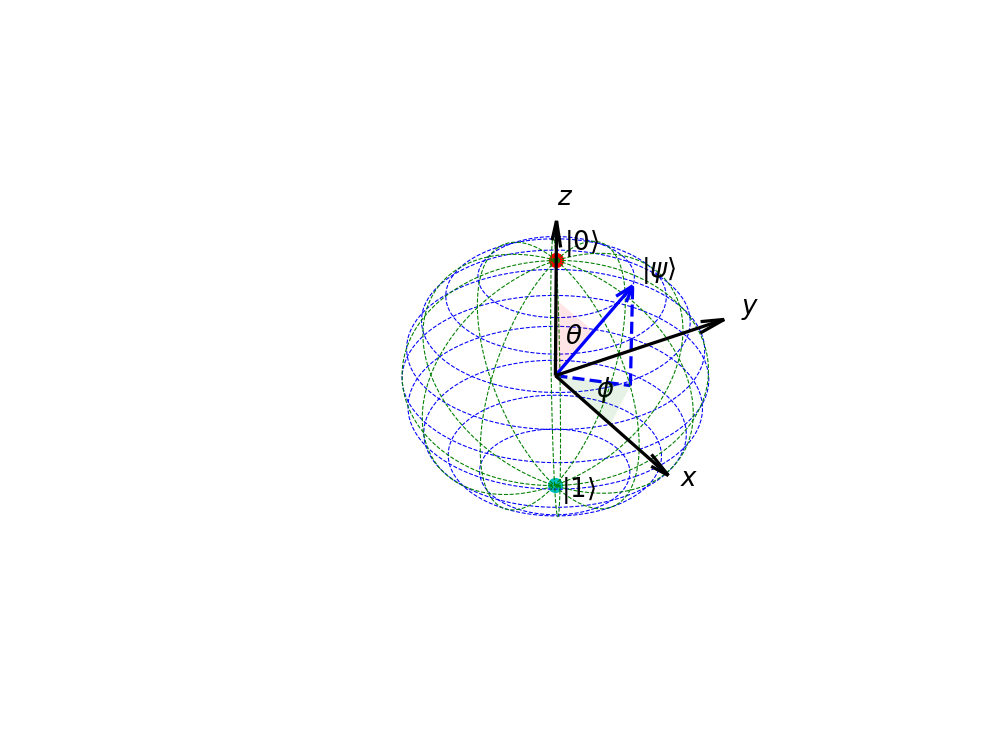

In [9]:
# The Bloch Sphere

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 3/2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.15)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$|\\psi\\rangle$', fontsize=12)
ax.plot(0,0,r,'ro')
ax.text3D(0.05, 0.05, 1.1*r, '$|0\\rangle$', fontsize=12)
ax.plot(0,0,-r,'co')
ax.text3D(0.05, 0.05, -1.1*r, '$|1\\rangle$', fontsize=12)

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$x$', fontsize=12)
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$y$', fontsize=12)
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$z$', fontsize=12)

ax.plot3D([0, x], [0, y], [0,0], 'b--')
#ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$', fontsize=12)
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/8, y/8, z/3, '$\\theta$', fontsize=12)
ax.text3D(x, y/4, 0, '$\phi$', fontsize=12)

# paint the theta sector
Bx = [0, x/2, ez[0]/2]   
By = [0, y/2, ez[1]/2]    
Bz = [0, z/2, ez[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# paint the phi sector
Bx = [0, x, ex[0]/2]   
By = [0, y, ex[1]/2]    
Bz = [0, 0, ex[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.1))

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'b--', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)
    
ax.set_xlim(-2,1.5)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1.5)

ax.axis('off')
plt.show()


A linear transformation of a qubit is a 2-by-2 complex matrix, say $V$, that preserves length, i.e., $\|V\psi\|=\|\psi\|$, i.e., $V^*V=I$, that is

\begin{equation}\label{eq:VUni}
  V = \begin{bmatrix} w & z \\ -\ov z & \ov w \end{bmatrix}
\end{equation}


The exponentials,

\begin{equation}\label{eq:Pexp}
  \eqalign{
    R(e_x,\gamma) &= \exp(-i\gamma\s_x/2) = \cos(\gamma/2)I-i\sin(\gamma/2)\s_x = 
       \begin{bmatrix} \cos(\gamma/2) & -i\sin(\gamma/2) \\  -i\sin(\gamma/2) & \cos(\gamma/2) \end{bmatrix} \cr
    R(e_y,\gamma) &= \exp(-i\gamma\s_y/2) = \cos(\gamma/2)I-i\sin(\gamma/2)\s_y = 
       \begin{bmatrix} \cos(\gamma/2) & -\sin(\gamma/2) \\ \sin(\gamma/2) & \cos(\gamma/2) \end{bmatrix} \cr
    R(e_z,\gamma) &= \exp(-i\gamma\s_z/2) = \cos(\gamma/2)I-i\sin(\gamma/2)\s_z = 
       \begin{bmatrix} \exp(-i\gamma/2) & 0 \\  0 & \exp(i\gamma/2) \end{bmatrix} \cr}
\end{equation}

while in the general case for axis $a=a_xe_x+a_ye_y+a_ze_z$ we use

\begin{equation}\label{eq:Pexpa}
    R(a,\gamma) \equiv \cos(\gamma/2)I-i\sin(\gamma/2)a\cdot\s
\end{equation}

To justify this rotation notation we establish

\begin{proposition}\label{prop:R2K} $u^{-1}_+\circ R(a,\gamma) \circ u_+ = K(a,\gamma)$
\end{proposition}


\begin{equation}\label{eq:Pexpxx}
  R(e_x,\gamma)u_+(e_x) = \frac{1}{\sqrt 2}\begin{bmatrix} \cos(\gamma/2) & -i\sin(\gamma/2) \\  -i\sin(\gamma/2) & \cos(\gamma/2) \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
   =  \frac{1}{\sqrt 2}\begin{bmatrix} \cos(\gamma/2) -i\sin(\gamma/2) \\ \cos(\gamma/2) -i\sin(\gamma/2)\end{bmatrix}
   =  \frac{\exp(-i\gamma/2)}{\sqrt 2}\begin{bmatrix} 1 \\ 1\end{bmatrix} \sim u_+(e_x)
\end{equation}

so $u^{-1}_+(R(e_x,\gamma)u_+(e_x)) = e_x$ while

\begin{equation}\label{eq:Pexpxy}
  R(e_x,\gamma)u_+(e_y) = \frac{1}{\sqrt 2}\begin{bmatrix} \cos(\gamma/2) & -i\sin(\gamma/2) \\  -i\sin(\gamma/2) & \cos(\gamma/2) \end{bmatrix} \begin{bmatrix} 1 \\ i \end{bmatrix}
   =  \frac{1}{\sqrt 2}\begin{bmatrix} \cos(\gamma/2) + \sin(\gamma/2) \\ i(\cos(\gamma/2) -\sin(\gamma/2))\end{bmatrix}
   =  \begin{bmatrix} \cos(\pi/4-\gamma/2) \\ i\sin(\pi/4-\gamma/2)\end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpxy2}
  u^{-1}_+(R(e_x,\gamma)u_+(e_y)) = \begin{bmatrix} 0 \\ \cos(\gamma) \\ \sin(\gamma) \end{bmatrix}
\end{equation}

and finally

\begin{equation}\label{eq:Pexpxz}
  R(e_x,\gamma)u_+(e_z) = \begin{bmatrix} \cos(\gamma/2) & -i\sin(\gamma/2) \\  -i\sin(\gamma/2) & \cos(\gamma/2) \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
   =  \begin{bmatrix} \cos(\gamma/2) \\ -i\sin(\gamma/2)\end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpxz2}
  u^{-1}_+(R(e_x,\gamma)u_+(e_z)) = \begin{bmatrix} 0 \\ -\sin(\gamma) \\ \cos(\gamma) \end{bmatrix}
\end{equation}

and now for $R(e_y,\gamma)$ we record

\begin{equation}\label{eq:Pexpyx}
  R(e_y,\gamma)u_+(e_x) = \frac{1}{\sqrt 2}\begin{bmatrix}  \cos(\gamma/2)-\sin(\gamma/2) \\
     \cos(\gamma/2)+\sin(\gamma/2) \end{bmatrix}  
     = \begin{bmatrix} \sin(\pi/4-\gamma/2) \\ \cos(\pi/4-\gamma/2)\end{bmatrix}
     = \begin{bmatrix} \cos(\pi/4+\gamma/2) \\ \sin(\pi/4+\gamma/2)\end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpyx2}
  u^{-1}_+(R(e_y,\gamma)u_+(e_x)) = \begin{bmatrix} \cos(\gamma) \\ 0 \\ -\sin(\gamma) \end{bmatrix}
\end{equation}

while

\begin{equation}\label{eq:Pexpyy}
  R(e_y,\gamma)u_+(e_y) = \frac{1}{\sqrt 2}\begin{bmatrix}  \cos(\gamma/2)-i\sin(\gamma/2) \\
     \sin(\gamma/2)+i\cos(\gamma/2) \end{bmatrix}  
     = \frac{\exp(-i\gamma/2)}{\sqrt 2}\begin{bmatrix}  1 \\ i \end{bmatrix} 
\end{equation}

so $u^{-1}_+(R(e_y,\gamma)u_+(e_y)) = e_y$ and finally

\begin{equation}\label{eq:Pexpyz}
  R(e_y,\gamma)u_+(e_z) = \begin{bmatrix}  \cos(\gamma/2) \\ \sin(\gamma/2) \end{bmatrix}  
\end{equation}

so

\begin{equation}\label{eq:Pexpyz2}
  u^{-1}_+(R(e_y,\gamma)u_+(e_z)) = \begin{bmatrix} \sin(\gamma) \\ 0 \\ \cos(\gamma) \end{bmatrix}
\end{equation}

and easiest of all for $R(e_z,\gamma)$ we record

\begin{equation}\label{eq:Pexpzx}
  R(e_z,\gamma)u_+(e_x) = \frac{1}{\sqrt 2}\begin{bmatrix}  \exp(-i\gamma/2)  \\ \exp(i\gamma/2) \end{bmatrix}  
     = \frac{\exp(-i\gamma/2)}{\sqrt 2}\begin{bmatrix} 1 \\ \exp(i\gamma)\end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpzx2}
  u^{-1}_+(R(e_z,\gamma)u_+(e_x)) = \begin{bmatrix} \cos(\gamma) \\ \sin(\gamma) \\ 0 \end{bmatrix}
\end{equation}

while

\begin{equation}\label{eq:Pexpzy}
  R(e_z,\gamma)u_+(e_y) = \frac{1}{\sqrt 2}\begin{bmatrix}  \exp(-i\gamma/2)  \\ i\exp(i\gamma/2) \end{bmatrix}  
     = \frac{\exp(-i\gamma/2)}{\sqrt 2}\begin{bmatrix} 1 \\ \exp(i(\gamma+\pi/2))\end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpzy2}
  u^{-1}_+(R(e_z,\gamma)u_+(e_y)) = \begin{bmatrix} -\sin(\gamma) \\ \cos(\gamma) \\ 0 \end{bmatrix}
\end{equation}

and finally

\begin{equation}\label{eq:Pexpzz}
  R(e_z,\gamma)u_+(e_z) = \begin{bmatrix} \exp(-i\gamma/2)  \\ 0 \end{bmatrix}  
     = \exp(-i\gamma/2) \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\end{equation}

so

\begin{equation}\label{eq:Pexpzz2}
  u^{-1}_+(R(e_z,\gamma)u_+(e_z)) = e_z
\end{equation}




\begin{exercise}\label{ex:Reig} Please show that $R(x,\theta)u_+(x)=\exp(-i\theta/2)u_+(x)$
\end{exercise}



We note that $\tr(R(a,\gamma))=\cos(\gamma/2)$

We next study compositions $R(c,\gamma)=R(b,\beta)R(a,\alpha)$ and need

\begin{equation}\label{eq:Sprod}
  \eqalign{(b\cdot\s)(a\cdot\s) 
  &= \begin{bmatrix} b_3 & b_1-ib_2 \\ b_1+ib_2 & -b_3 \end{bmatrix}
     \begin{bmatrix} a_3 & a_1-ia_2 \\ a_1+ia_2 & -a_3 \end{bmatrix} \cr
  &= \begin{bmatrix} a^Tb+i(b_1a_2-b_2a_1) & b_3a_1-a_3b_1 +i(a_3b_2-a_2b_3)\\
            a_3b_1-b_3a_1 + i(a_3b_2-b_3a_2) & a^Tb +i(b_2a_1-b_1a_2) \end{bmatrix} \cr
  &= a^TbI + i(a_3b_2-a_2b_3)\s_x + i(b_3a_1-a_3b_1)\s_y + i(b_1a_2-b_2a_1)\s_z \cr
  &= a^TbI + i(b\times a)\cdot\s \cr} 
\end{equation}

and so

\begin{equation}\label{eq:Sprod2}
  \eqalign{R(b,\beta)R(a,\alpha) 
   &= (\cos(\beta/2)I-i\sin(\beta/2)(b\cdot\s))(\cos(\alpha/2)I-i\sin(\alpha/2)(a\cdot\s)) \cr
   &= \cos(\beta/2)\cos(\alpha/2)I - \sin(\beta/2)\sin(\alpha/2)(b\cdot\s)(a\cdot\s) - 
           i(\cos(\beta/2)\sin(\alpha/2)(a\cdot\s)+\cos(\alpha/2)\sin(\beta/2)(b\cdot\s)) \cr
   &= (\cos(\beta/2)\cos(\alpha/2) - \sin(\beta/2)\sin(\alpha/2)a^Tb)I \cr
   &\hskip 0.5in -i(\sin(\beta/2)\sin(\alpha/2)(b\times a)+\cos(\beta/2)\sin(\alpha/2)a + \cos(\alpha/2)\sin(\beta/2)b)\cdot\s \cr
   &= \cos(\gamma/2)I - i\sin(\gamma/2)c\cdot\s \cr}
\end{equation}
  
where the trace of each side reveals the resulting angle, $\gamma$,

\begin{equation}\label{eq:Rcomp1}
  \cos(\gamma/2) = \cos(\beta/2)\cos(\alpha/2) - \sin(\beta/2)\sin(\alpha/2)a^Tb
\end{equation}

which in turn reveal the resulting axis, $c$, 

\begin{equation}\label{eq:Rcomp2}
  \sin(\gamma/2)c = \sin(\beta/2)\sin(\alpha/2)(b\times a)+\cos(\beta/2)\sin(\alpha/2)a + \cos(\alpha/2)\sin(\beta/2)b
\end{equation}




In [22]:
# python check

import numpy as np

I = np.eye(2)

a = np.random.randn(3)
a = a/np.linalg.norm(a)

b = np.random.randn(3)
b = b/np.linalg.norm(b)

sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])

ads = a[0]*sx + a[1]*sy + a[2]*sz
bds = b[0]*sx + b[1]*sy + b[2]*sz
lhs = bds@ads
#print(lhs)   # 30

bca = np.cross(b,a)
cds = bca[0]*sx + bca[1]*sy + bca[2]*sz
rhs = np.dot(a,b)*I + 1j*cds
#print(rhs)   # 30

alpha = np.random.rand()*np.pi
beta = np.random.rand()*np.pi

Ra = np.cos(alpha/2)*I - 1j*np.sin(alpha/2)*ads
Rb = np.cos(beta/2)*I - 1j*np.sin(beta/2)*bds
Rc = Rb@Ra
print(Rc)

gamma = 2*np.arccos(np.cos(alpha/2)*np.cos(beta/2)-np.sin(alpha/2)*np.sin(beta/2)*np.dot(a,b))
c = (np.sin(alpha/2)*np.sin(beta/2)*bca + np.sin(alpha/2)*np.cos(beta/2)*a + np.cos(alpha/2)*np.sin(beta/2)*b)/np.sin(gamma/2)
RcD = np.cos(gamma/2)*I - 1j*np.sin(gamma/2)*(c[0]*sx+c[1]*sy+c[2]*sz)
print(RcD)

[[-0.47898755-0.86831224j  0.03174289-0.12488861j]
 [-0.03174289-0.12488861j -0.47898755+0.86831224j]]
[[-0.47898755-0.86831224j  0.03174289-0.12488861j]
 [-0.03174289-0.12488861j -0.47898755+0.86831224j]]


### Quantum Gates

The sphere $S^2$ parametrizes observers and states and transformations of states.

Linear transformations of $\psi$ will just walk us around the Bloch. These must be Unitary and of the form

\begin{equation}\label{eq:Uni}
  M = \cos(a)I + i\sin(a)n\cdot\s
\end{equation}

where $\s$ is the set of Pauli matrices. 

\begin{exercise}\label{ex:Upa0}
Please confirm that $(n\cdot\s)^2=I$ and use this confirm that $M^*M=I$ and $\det(M)=1$.
\end{exercise}

Let us take the concrete example

\begin{equation}\label{eq:Pz}
   M_z(a) = \cos(a)I + i\sin(a)\s_z = \begin{bmatrix} \exp(ia) & 0 \\ 0 & \exp(-ia) \end{bmatrix}
     = \exp(ia)\begin{bmatrix} 1 & 0 \\ 0 & \exp(-i2a) \end{bmatrix}
\end{equation}

and so

\begin{equation}\label{eq:psiz}
   M_z(a)\psi = \exp(ia)\begin{bmatrix} 1 & 0 \\ 0 & \exp(-i2a) \end{bmatrix}
      \begin{bmatrix} \cos(\theta/2) \\ \exp(i\phi)\sin(\theta/2) \end{bmatrix}
      = \exp(ia)\begin{bmatrix} \cos(\theta/2) \\ \exp(i(\phi-2a))\sin(\theta/2) \end{bmatrix}
\end{equation}

is rotation by $2a$ about the $z$ axis, as illustrated in Figure \ref{fig:Bwalk}.

Similarly,

\begin{equation}\label{eq:Px}
   M_x(a) = \cos(a)I + i\sin(a)\s_x = \begin{bmatrix} \cos(a) & i\sin(a) \\ i\sin(a) & \cos(a) \end{bmatrix}
\end{equation}

and so

\begin{equation}\label{eq:psix}
   \eqalign{
   M_x(a)\psi &= \begin{bmatrix} \cos(a)\cos(\theta/2) + i\exp(i\phi)\sin(a)\sin(\theta/2) \\
       i\sin(a)\cos(\theta/2) + \exp(i\phi)\cos(a)\sin(\theta/2) \end{bmatrix} \cr
       &= \exp(i(\phi/2+\pi/4))\begin{bmatrix} \exp(-i(\phi/2+\pi/4))\cos(a)\cos(\theta/2) + \exp(i(\phi/2+\pi/4))\sin(a)\sin(\theta/2) \\
       \exp(i(-\phi/2+\pi/4))\sin(a)\cos(\theta/2) + \exp(i(\phi/2-\pi/4))\cos(a)\sin(\theta/2) \end{bmatrix} \cr
       &= \exp(i(\phi/2+\pi/4))\begin{bmatrix} \cos(\phi/2+\pi/4))\cos(\theta/2-a) - i\sin(\phi/2+\pi/4))\cos(\theta/2+a) \\
       \exp(i(-\phi/2+\pi/4))\sin(a)\cos(\theta/2) + \exp(i(\phi/2-\pi/4))\cos(a)\sin(\theta/2) \end{bmatrix} \cr}
\end{equation}








<IPython.core.display.Javascript object>


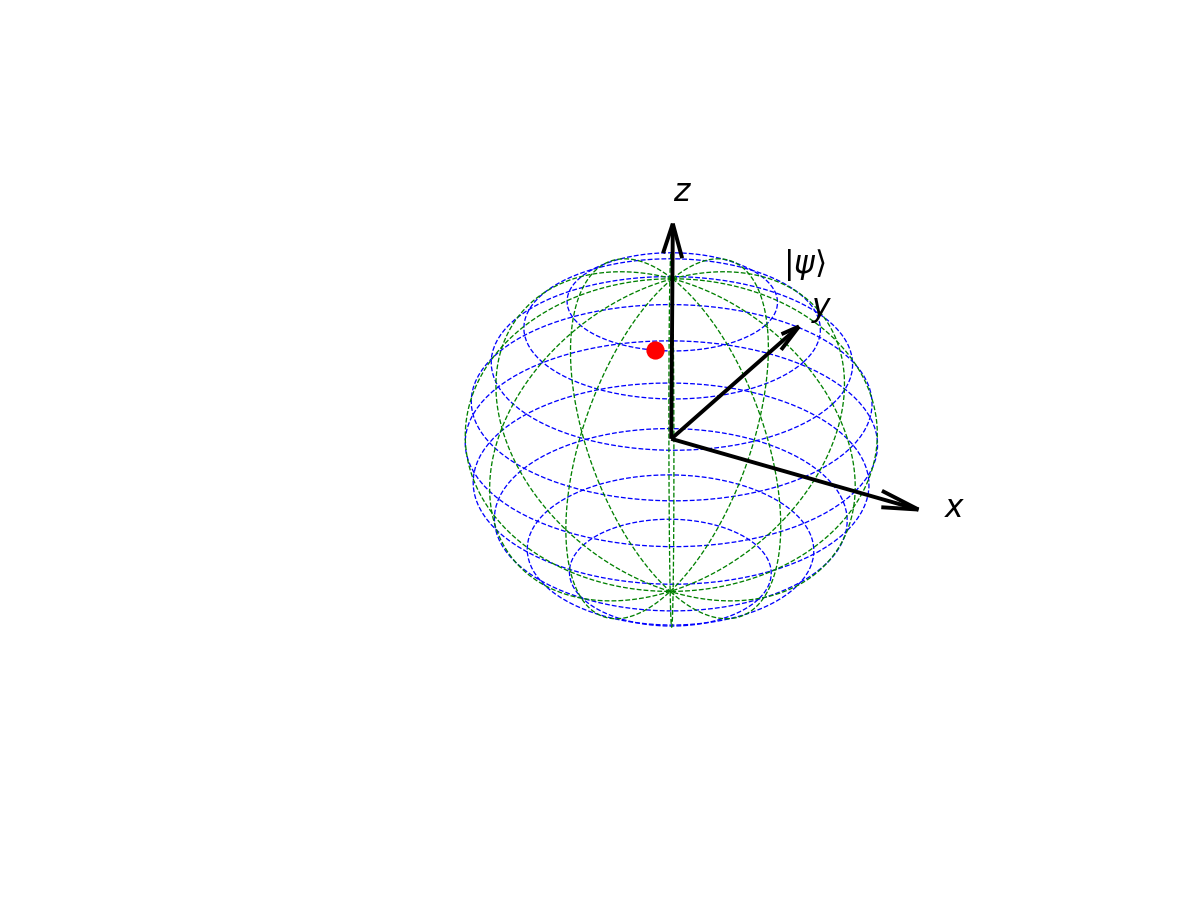

interactive(children=(FloatSlider(value=0.0, description='a', max=6.283185307179586), Output()), _dom_classes=…

In [106]:
# Motion on the Bloch Sphere

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'b--', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = (3/2)*np.sin(theta)*np.cos(phi)
    v = (3/2)*np.sin(theta)*np.sin(phi)
    w = (3/2)*np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)

theta = np.pi/6
phi = np.pi/4
r = 3/2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

psi, = ax.plot3D(x,y,z,'ro')
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$|\\psi\\rangle$', fontsize=12)

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)
tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$x$', fontsize=12)
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$y$', fontsize=12)
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$z$', fontsize=12)

ax.set_xlim(-2,1.5)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1.5)
ax.axis('off')

def update(a=widgets.FloatSlider(min=0, max=2*np.pi, step=0.1, value=0) ):
    x = r*np.sin(theta)*np.cos(phi-2*a)
    y = r*np.sin(theta)*np.sin(phi-2*a)
    z = r*np.cos(theta)
    psi.set_data_3d(x, y, z)
    fig.canvas.draw_idle()

interact(update);


\begin{myfig}\label{fig:Bwalk} Rotation of $|\psi\rangle$ about the $z$-axis.\end{myfig}

We follow Ekert and start with the concrete "circuit" of Figure \ref{fig:HPH}. We read the flow from left to right from the basis states to the basis states. Starting from state $|1\rangle$ we see at its first black dot that it may transition to state $|0\rangle$ with probability amplitude $s$ or it may stay its course with probability amplitude $-s$. Assuming the latter it then encounters a red "phase gate" that multiplies its probability amplitude by $\exp(i\phi_2)$. If, at the next black branch point it follows the upper track we find that the probability amplitude associated with state $|1\rangle$ remaining in this state via the upper track is $s^2\exp(i\phi_2)$. In like fashion, the probability amplitude associated with state $|1\rangle$ remaining in this state via the lower track is $s^2\exp(i\phi_1)$ and as such the total probability amplitude that $|1\rangle$ transitions to $|1\rangle$ is 

\begin{equation}\label{eq:1persist}
\eqalign{ s^2\exp(i\phi_2) + s^2\exp(i\phi_1) 
  &= s^2\exp(i(\phi_1+\phi_2)/2)(\exp(i(\phi_1-\phi_2)/2)+\exp(-i(\phi_1-\phi_2)/2)) \cr
  &= \exp(i(\phi_1+\phi_2)/2)\cos(\phi/2) \where \phi\equiv \phi_1-\phi_2 \cr}
\end{equation}

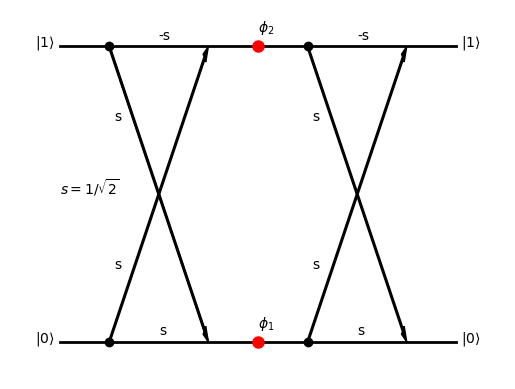

In [50]:
# first quantum circuit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.plot([0,8],[2,2],'k',linewidth=2)
plt.plot([0,8],[0,0],'k',linewidth=2)
plt.arrow(1,0,2,2,width=0.025,color='k',length_includes_head = True)
plt.arrow(1,2,2,-2,width=0.025,color='k',length_includes_head = True)

plt.plot([1,3],[2,0],'k')
plt.arrow(5,0,2,2,width=0.025,color='k',length_includes_head = True)
plt.arrow(5,2,2,-2,width=0.025,color='k',length_includes_head = True)

plt.text(2,0.05,'s')
plt.text(2,2.05,'-s')
plt.text(1.1,1/2,'s')
plt.text(1.1,3/2,'s')

plt.text(4+2,0.05,'s')
plt.text(4+2,2.05,'-s')
plt.text(4+1.1,1/2,'s')
plt.text(4+1.1,3/2,'s')

plt.plot(1,0,'ko')
plt.plot(1,2,'ko')
plt.plot(5,0,'ko')
plt.plot(5,2,'ko')

plt.plot(4,0,'ro',markersize=8)
plt.plot(4,2,'ro',markersize=8)

plt.text(4,2.1,'$\\phi_2$')
plt.text(4,0.1,'$\\phi_1$')

plt.text(-.5,0,'$|0\\rangle$')
plt.text(8.1,0,'$|0\\rangle$')
plt.text(-.5,2,'$|1\\rangle$')
plt.text(8.1,2,'$|1\\rangle$')

plt.text(0,1,'$s=1/\\sqrt{2}$')

plt.axis([-1,9,-0.25,2.25])
plt.axis('off');

\begin{myfig}\label{fig:HPH} A quantum circuit of 3 gates. \end{myfig}

We can compute the three other transition probability amplitudes more readily by writing the first and second gates as

\begin{equation}\label{eq:HPp}
  H = \begin{bmatrix} s & -s \\ s & s \end{bmatrix}  \and 
  P_\phi = \begin{bmatrix} \exp(i\phi_1) & 0 \\ 0 & \exp(i\phi_1) \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:HPH}
Show that

\begin{equation}\label{eq:HPp2}
  HP_\phi H = \exp(i(\phi_1+\phi_2)/2)
      \begin{bmatrix} \cos(\phi/2) & -i\sin(\phi/2) \\ -i\sin(\phi/2) & \cos(\phi/2) \end{bmatrix}
      \where \phi\equiv \phi_1-\phi_2
\end{equation}

as above.
\end{exercise}



So unitaries are rotations, and Ekert 2.6 argues by Euler that H and phase gates suffice. And then in fact that H and T suffice to get you close (Solovay and Kitaev).

<IPython.core.display.Javascript object>


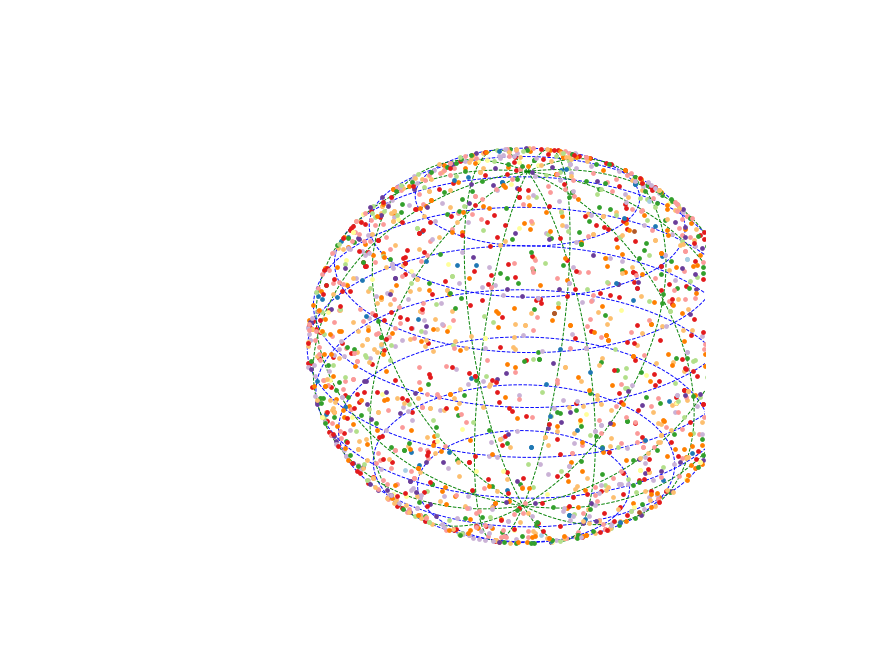

In [120]:
# Motion on the Bloch Sphere by A = HTHT and B = THTH

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

nc = 200
cmap = mpl.colormaps['Paired']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, nc))

#fig, ax = plt.subplots(layout='constrained')

#for i, color in enumerate(colors):
#    ax.plot([0, i], color=color)


fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# plot lines of latitude
phi = np.linspace(0, 2*np.pi, 100)
for lat in range(-60,75,15):
    theta = (np.pi/180.0)*(90 - lat)*np.ones(phi.size)
    u = np.sin(theta)*np.cos(phi)
    v = np.sin(theta)*np.sin(phi)
    w = np.cos(theta)
    ax.plot(u, v, w, 'b--', linewidth=0.5)
    
# plot lines of longitude
eps = 1e-6
theta = np.linspace(eps, np.pi-eps, 100)
for long in range(-180,180,30):
    phi = -(np.pi/180.0)*(180 - long)*np.ones(theta.size)
    u = np.sin(theta)*np.cos(phi)
    v = np.sin(theta)*np.sin(phi)
    w = np.cos(theta)
    ax.plot(u, v, w, 'g--', linewidth=0.5)

s = 1/np.sqrt(2)
H = 1j*np.array([[s,s],[s,-s]])
#T = np.array([[1,0],[0,s+s*1j]])
T = np.array([[np.exp(-1j*np.pi/8),0],[0,np.exp(1j*np.pi/8)]])
HT = H@T
TH = T@H
A = HT@HT
B = TH@TH
M = np.array([A,B])  # the generators
U = np.eye(2)

for n in range(2000):
    m = np.random.randint(0,2)
    U = M[m]@U
    t = np.arccos((U[0,0]+U[1,1]).real/2)
    ind = int(199 * t / (np.pi))
    #print(ind)
    s = np.sin(t)
    nx = (U[0,1]+U[1,0])/(2*1j*s)
    ny = (U[0,1]-U[1,0])/(2*s)
    nz = (U[0,0]-U[1,1])/(2*1j*s)
    ax.plot3D(nx, ny, nz, '.', color = colors[ind], markersize=3)
    
ax.set_xlim(-2,1.5)
ax.set_ylim(-2,1.5)
ax.set_zlim(-1.5,1.5)
ax.axis('off');


\begin{myfig}\label{fig:HTrand} The normal directions associated with a random composition of $A$ and $B$ of length 2000. \end{myfig}

In [237]:
# build the look up function for SK

%matplotlib inline
import numpy as np

def un(A):
    e = np.linalg.eig(A)[0]
    return max(abs(e))

Px = np.array([[0, 1],[1, 0]])
Py = np.array([[0, -1j],[1j, 0]])
Pz = np.array([[1, 0],[0, -1]])
n = np.random.randn(3)
n = n/np.linalg.norm(n)
theta = np.random.rand()*2*np.pi
U = np.cos(theta)*np.eye(2) + 1j*np.sin(theta)*(n[0]*Px+n[1]*Py+n[2]*Pz)

s = 1/np.sqrt(2)
H = 1j*np.array([[s,s],[s,-s]])
T = np.array([[np.exp(-1j*np.pi/8),0],[0,np.exp(1j*np.pi/8)]])
HT = H@T
TH = T@H
A = HT@HT
B = TH@TH
M = np.array([A,B])  # the generators
C = np.eye(2)

iter = 0
err = 1
maxiter = 10000
tol = 0.1

while err > tol and iter < maxiter:
    m = np.random.randint(0,2)
    C = M[m]@C
    iter = iter + 1
    err = un(C-U)
    #print(err)
    
print('iter = ', iter)
    
    


iter =  1661


We check Claim 1 in DN.

\begin{equation}\label{eq:DN10}
  V = R(e_x,\phi) = 
       \begin{bmatrix} \cos(\phi/2) & -i\sin(\phi/2) \\  -i\sin(\phi/2) & \cos(\phi/2) \end{bmatrix} \and
  W=  R(e_y,\phi)  = 
       \begin{bmatrix} \cos(\phi/2) & -\sin(\phi/2) \\ \sin(\phi/2) & \cos(\phi/2) \end{bmatrix}
\end{equation}

Claim (i): $WV^*W^*=R(m,\phi)$ where $m=[-\cos(\phi),0,\sin(\phi)]$

Claim (ii): $VWV^*W^*=R(n,\theta)$ where (\ref{eq:Rcomp1}) specifies

\begin{equation}\label{eq:Rcomp11}
  \cos(\theta/2) = \cos^2(\phi/2) + \sin^2(\phi/2)\cos(\phi) = 1-2\sin^4(\phi/2)
\end{equation}

consistent with DN(10).





In [ ]:
# balanced commutator following Dawson and Nielsen

%matplotlib inline
import numpy as np

def un(A):
    e = np.linalg.eig(A)[0]
    return max(abs(e))

I = np.eye(2)
Px = np.array([[0, 1],[1, 0]])
Py = np.array([[0, -1j],[1j, 0]])
Pz = np.array([[1, 0],[0, -1]])

# given U in PU_2 find theta and p
theta = np.arccos((U[0,0]+U[1,1]).real/2)
s = np.sin(theta)
px = (U[0,1]+U[1,0])/(2*1j*s)
py = (U[0,1]-U[1,0])/(2*s)
pz = (U[0,0]-U[1,1])/(2*1j*s)

# solve (10) for phi and build V and W
y = (1+np.cos(theta/2))/2   # can also use other root  y = (1-np.cos(theta/2))/2
phi = 2*np.arcsin(y**(1/4))
V = np.cos(phi)*I + 1j*sin(phi)*Px
W = np.cos(phi)*I + 1j*sin(phi)*Py